In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 1000
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

In [0]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))

model.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [0]:
model.compile('adam','binary_crossentropy')

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 8)         1160      
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 24, 24, 8)         584       
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 26, 26, 16)        1168      
_________________________________________________________________
conv2d_transpose_14 (Conv2DT (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 1)        

In [0]:

model.fit(input_train, input_train,
                epochs=10,
                batch_size=100)

Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0866
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0611
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0601
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0596
Epoch 5/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0594
Epoch 6/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0592
Epoch 7/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0591
Epoch 8/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0590
Epoch 9/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0589
Epoch 10/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0589


In [0]:
prediction = model.predict(input_test)

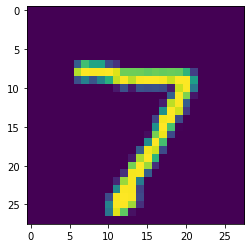

In [0]:
import matplotlib.pyplot as plt
plt.imshow(prediction[0].reshape(28,28))

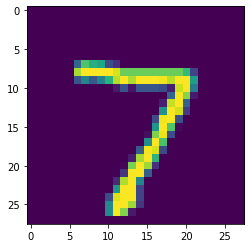

In [0]:
plt.imshow(input_test[0].reshape(28,28))